# Statistical Learning Coursework 2022 

Files with data that have to be downloaded:

- Clusters.csv
- avocado_data.csv

Please answer all problems within this notebook, and rename as 

**SL_CW_XXXXXX.ipynb**

where **XXXXXX** is replaced with your student number. Your finished notebook should be uploaded to the coursework submission dropbox on moodle before

**23:59 on Tuesday 17th May 2022**



### STUDENT REFERENCE NUMBER

Type your 6-digit student reference number in place of `xxxxxx` in the following cell:

In [1]:
# 940009

#### You may find the following imported libaries and functions useful (but you may need to import additional ones)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


# spliting data into train, test sets
from sklearn.model_selection import train_test_split

#Digits data
from sklearn.datasets import load_digits

#Unsupervised learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


#preprocessing our data set 
from sklearn.preprocessing import StandardScaler

## Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor


## Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from keras.preprocessing.image import ImageDataGenerator

#Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

# metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
#We first "mount" the google drive
from google.colab import drive
drive.mount('/content/drive')

#Set path to where you placed the data
from pathlib import Path 
data_dir = Path('/content/drive/My Drive/cw_data')

Mounted at /content/drive


# Useful functions for later use
`plot_image_grid:` Plots a grid of images whose colormap is determined by the prediction of an image classifier.\
`plot_class_accuracy:` Plots a bar chart of accuracy per class in a classification problem.\
`print_metrics:` Prints the mean squared error and $R^2$ value for a given prediction and truth array.

In [4]:
def plot_image_grid(X, y_test, y_pred, class_names):
    """
    Plots a grid of images contained within image array, X, that has 
    been used to train an image classifier. The color of the image is
    green if the prediction is correct, and red if not. The title of 
    the image is the predicted class.
    
    Arguments:
    X : np arrray of test images, dimensions (n_ims, (im_size))
    y_test : numpy array of true image class, dimensions (n_ims,)
    y_pred : np array of predicted imaga class, dimensions (n_ims,)
    class_names : list or np array of class names for titles, dimension (nims)
    
    """
    y_test = y_test.argmax(1)
    y_pred = y_pred.argmax(1)
    X = X.reshape(X.shape[:3])
    L = 10 
    plt.figure(figsize=(15, 15))
    fig, ax = plt.subplots(L , L , figsize = (15,15))
    k=0
    for i in range(L):
        for j in range(L):
            if y_test[k] != y_pred[k]:
                ax[i,j].imshow(X[k], cmap='Reds')
                ax[i,j].set_title(f'pred:{class_names[y_pred[k]]}', c='red')
            else:
                ax[i,j].imshow(X[k], cmap='Greens')
                ax[i,j].set_title(f'pred:{class_names[y_pred[k]]}', c='green')
            ax[i,j].axis('off')
            k +=1
    plt.tight_layout()
    plt.show()

def print_metrics(y_test, y_pred):
    """
    Prints the Mean-Squared error and R2 value for given prediction and truth values.
    
    Arguments:
    y_test : np array of truth values, dimensions (n_datapoints,)
    y_pred : np array of prediction values, dimensions (n_datapoints,)
    """
    mse_val = mean_squared_error(y_test, y_pred)
    r2_val = r2_score(y_test, y_pred)
    print(f"MSE {mse_val}, R^2 {r2_val}")
    

def plot_history(history):
    """
    Plots the accuracy and loss on the training and validation data for each epoch.

    Arguments:
    history : keras.callbacks.History
    """
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="training loss")
    plt.plot(history.history['val_loss'], label="val loss")
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="training accuracy")
    plt.plot(history.history['val_accuracy'], label="val accuracy")
    plt.legend(loc='lower right')

    plt.show()
    
def plot_confusion_matrix(y_test, y_pred, class_names):
    """
    Plots a confusion matrix.
    
    Arguments:
    y_test : numpy array of true image class, dimensions (n_ims,)
    y_pred : np array of predicted imaga class, dimensions (n_ims,)
    class_names : list or np array of class names for titles, dimension (nims)
    """
    plt.figure(figsize=(15, 15))
    conf = confusion_matrix(y_test.argmax(1), y_pred.argmax(1))
    sns.heatmap(conf, annot=True ,xticklabels=class_names, yticklabels=class_names, fmt='g', cbar=False )
    plt.show()

    

# Problem 1: Digit classification (30 Marks)

In this problem you will classify digits from small handwritten images. 

  1. (5 marks) Use principle components analysis to produce a 5 dimensional feature vector for each 64 dimensional digit image.
  2. (5 mark) Split your low dimensional data into training and test sets. 
  3. (10 marks) Fit a logistic regression classifier to the training set and estimate the the predictive power of the model using the test set. Plot a bar chart showing the prediction accuracy for each digit. 
  4. (10 mark) **Open ended question:** Using *any* method you wish, build a digit classifier with the best possible predictive power. Credit will be given for for clear coding and comments, creative and rigourous use of methods, and quality of predictions on the test data.  

The cell below will load the data in the form a set of image vectors $X$ and digit values $y$. 


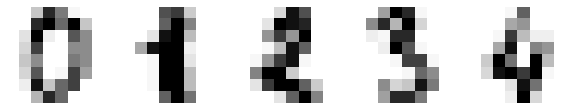

In [5]:
#First download the image data and plot some examples
digits = load_digits()
X1 = digits.data
y1 = digits.target
#The data consists of 8x8 pixel images unravelled into vectors of length 64
#To plot a digit you must reshape into and 8x8 array

#Example
fig,ax = plt.subplots(1,5,figsize=(10,2))
for i in range(5):
    dig = X1[i].reshape(8,8)
    ax[i].imshow(dig,cmap='Greys')
    ax[i].axis('off')
plt.show()

In [6]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize

# Performing Principle Components Analysis to reduce the dimensionality of the data
pca = PCA(n_components=5)
feature_vectors = pca.fit_transform(X1)
feature_vectors = normalize(feature_vectors)

In [7]:
# Splitting the data into training and test sets
X1_PCA_train, X1_PCA_test, y1_train, y1_test = train_test_split(feature_vectors, y1, test_size=0.2)

In [8]:
# Initalising the regressor and fitting to the data
logreg = LogisticRegression(random_state=0)
logreg.fit(X1_PCA_train, y1_train)

LogisticRegression(random_state=0)

In [9]:
# Testing the model and printing the score
y1_pred = logreg.predict(X1_PCA_test)
print_metrics(y1_test, y1_pred)

MSE 3.975, R^2 0.5121586289380955


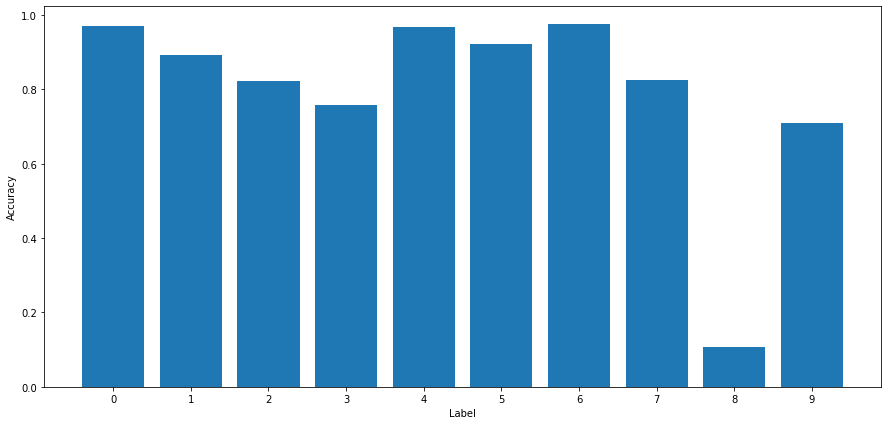

In [10]:
# Plotting a bar chart of accuracy per digit
def plot_class_accuracy(y_test, y_pred):
    plt.figure(figsize=(15, 7))
    acc = []
    for i in range(10):
        acc.append(np.sum(y_pred[y_test==i]==i) / np.sum(y_test==i))
    x = np.arange(10)
    plt.bar(x, acc)
    plt.xticks(x)
    plt.ylabel('Accuracy')
    plt.xlabel('Label')
    plt.show()
    
plot_class_accuracy(y1_test, y1_pred)

In [11]:
# Reshaping the data into an array of image tensors for the implementation of a CNN
n_ims = X1.shape[0]
X1_nn = X1.reshape(n_ims, 8, 8, 1)

# Converting numerical labels to categoricals
y1_nn = tf.keras.utils.to_categorical(y1, 10) 

In [12]:
# Splitting the data into testing and training sets
X1_nn_train, X1_nn_test, y1_nn_train, y1_nn_test = train_test_split(X1_nn, y1_nn, test_size=0.1)

In [13]:
# Defining parameters for the neural network
loss = 'categorical_crossentropy'
metrics = ["accuracy"] 
EPOCHS = 40
BATCH_SIZE = 128
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# Setting up image data generator
datagen = ImageDataGenerator(
    rescale=1./255, 
    featurewise_center=True, 
    featurewise_std_normalization=True,
    )

# Rescaling data
datagen.fit(X1_nn_train) 
datagen.fit(X1_nn_test)

In [15]:
# Setting up train and test data generators
mnist_train_dataset = datagen.flow(
    X1_nn_train, 
    y1_nn_train,
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    )


mnist_test_dataset =  datagen.flow(
    X1_nn_test,
    y1_nn_test,
    batch_size=1
    )

In [16]:
# Defining the convolutional neural network
mnist_model = tf.keras.models.Sequential([
    # Convolution blocks
    tf.keras.layers.Conv2D(50, (3, 3), activation='relu', input_shape=(8, 8, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(25, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    # Classification layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
        ])

In [17]:
# Compiling the model
mnist_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [18]:
# Checkpoint for saving the best model weights 
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "mnist_model.h5", 
    monitor='val_accuracy',
    verbose = 1,
    save_best_only = True
)

# Stops training if val loss has not improved for 5 epochs
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1
)

# Learning rate decay function
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Setting up learning rate scheduler
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(scheduler)

# Initialising callbacks list
mnist_callbacks_list = [checkpoint, earlystopping, lr_scheduler]

In [19]:
# Training the model 
mnist_history = mnist_model.fit(
    mnist_train_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data = mnist_test_dataset, 
    callbacks=mnist_callbacks_list
)

Epoch 1/40
12/13 [==========================>...] - ETA: 0s - loss: 2.1613 - accuracy: 0.3136
Epoch 1: val_accuracy improved from -inf to 0.62222, saving model to mnist_model.h5
13/13 [==============================] - 14s 110ms/step - loss: 2.1355 - accuracy: 0.3340 - val_loss: 1.7049 - val_accuracy: 0.6222 - lr: 0.0010
Epoch 2/40
11/13 [========================>.....] - ETA: 0s - loss: 1.3509 - accuracy: 0.6348
Epoch 2: val_accuracy improved from 0.62222 to 0.85556, saving model to mnist_model.h5
13/13 [==============================] - 1s 66ms/step - loss: 1.2680 - accuracy: 0.6537 - val_loss: 0.6450 - val_accuracy: 0.8556 - lr: 0.0010
Epoch 3/40
 8/13 [=================>............] - ETA: 0s - loss: 0.6179 - accuracy: 0.8209
Epoch 3: val_accuracy improved from 0.85556 to 0.91111, saving model to mnist_model.h5
13/13 [==============================] - 1s 63ms/step - loss: 0.5551 - accuracy: 0.8355 - val_loss: 0.3103 - val_accuracy: 0.9111 - lr: 0.0010
Epoch 4/40
13/13 [===========

In [20]:
# Loading the best model weights and predicting on the test set
mnist_model.load_weights("mnist_model.h5")
y1_nn_pred = mnist_model.predict(X1_nn_test)

# Evaluating the model
y1_nn_acc = mnist_model.evaluate(X1_nn_test,y1_nn_test, batch_size=100, verbose=0)
print('Accuracy:', y1_nn_acc[1])


Accuracy: 0.9333333373069763


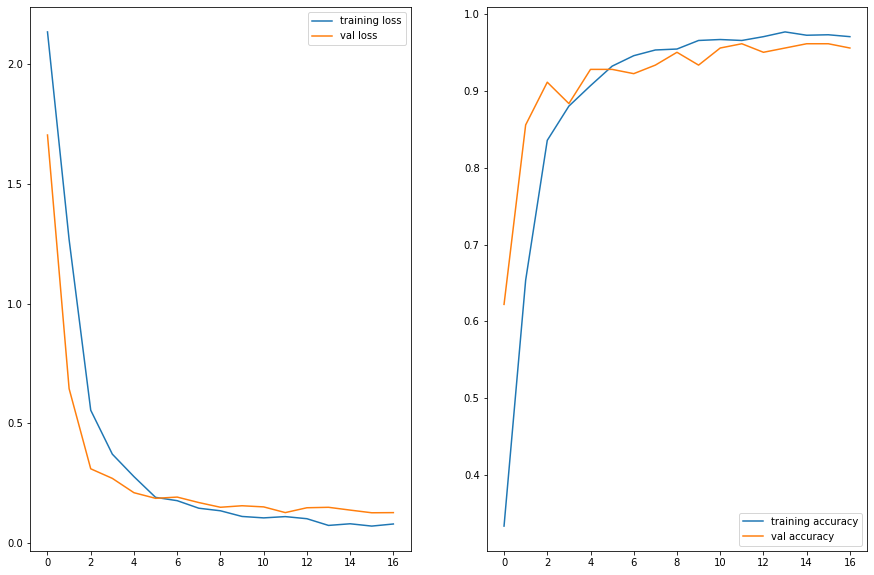

In [21]:
# Plotting loss and accuracy per epoch
plot_history(mnist_history)

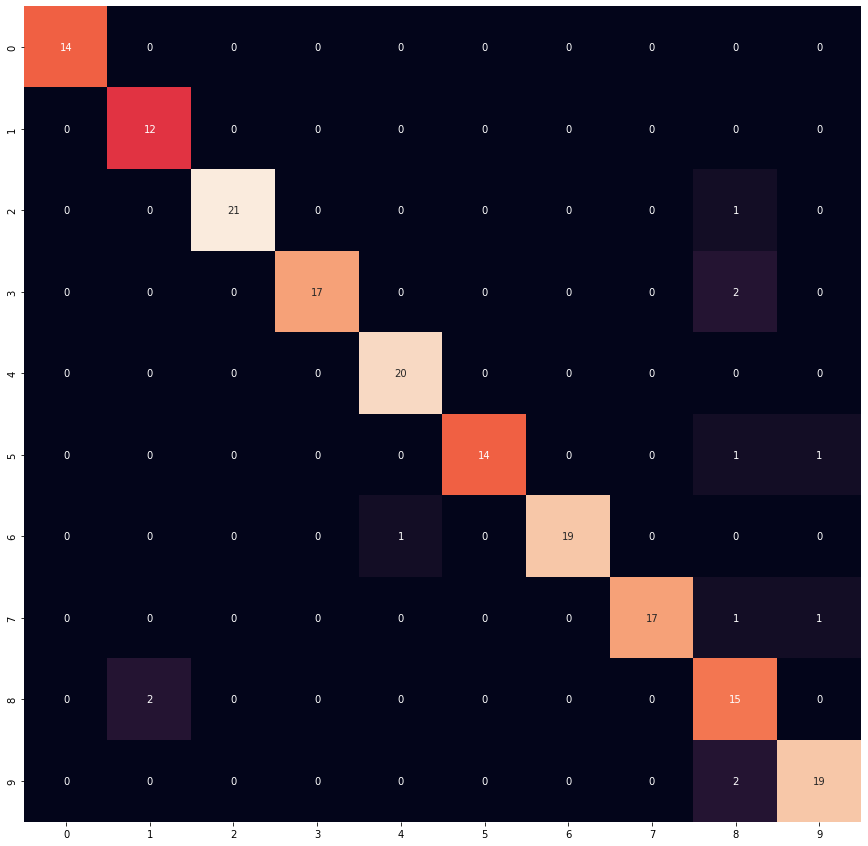

In [22]:
# Plotting a confusion matrix of predictions
plot_confusion_matrix(y1_nn_test, y1_nn_pred, np.arange(10))

<Figure size 1080x1080 with 0 Axes>

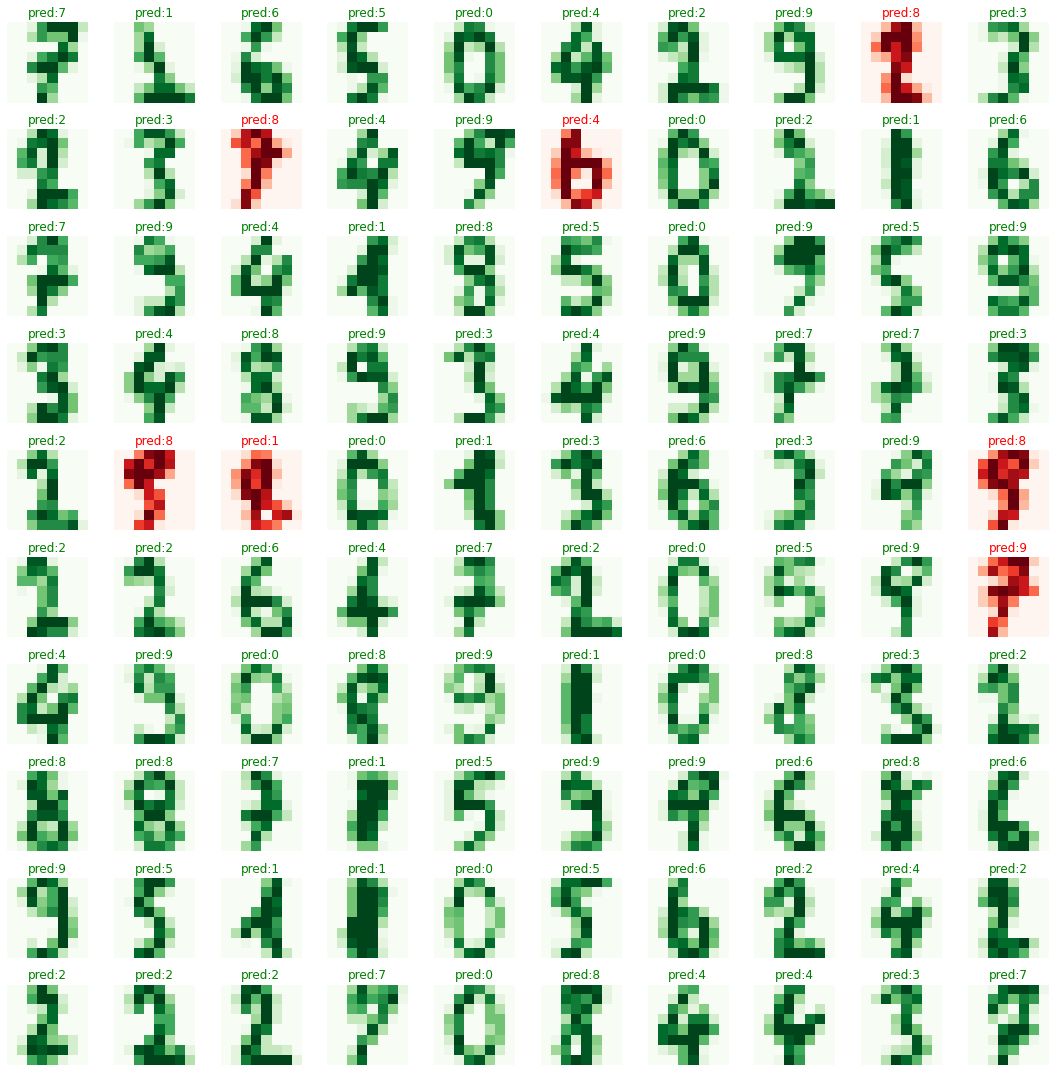

In [23]:
# Plotting a grid of image predictions
plot_image_grid(X1_nn_test, y1_nn_test, y1_nn_pred, np.arange(10))

# Problem 2: Avocado prices (30 Marks)

  1. (5 marks) Load the __"avocado_data.csv"__ file in to a pandas DataFrame. The __response/target__ variable is contained in the `Price' column, and all other columns are __predictors/features__. Extract predictors and responses making sure that you include only the columns with numerical values. Scale predictors to have 0 mean and unit variance. Split your data into training and test sets.
  2. (5 marks) **Plot** some predictors versus the price in a way you find the most convenient. Which predictors do you think will be most important?
  3. (5 marks) Fit a standard __multilinear regression model__ which uses all the predictors/features. Estimate the $R^2$ and MSE values of your model.
  4. (5 marks) Use __Lasso regression__ to create a model which uses only four features. What is the $R^2$ of this simpler model?
  5. (10 marks) **Open ended question:** Using *any* method you wish, build a avocado price predictor with the best possible predictive power. Credit will be given for for clear coding and comments, creative and rigourous use of methods, and quality of predictions on the test.

In [24]:
# Loading the data into a pandas DataFrame
df_avocado = pd.read_csv(data_dir/'avocado_data.csv')

# Selecting only numeric columns 
df_avocado_numeric = df_avocado.select_dtypes(np.number)

In [25]:
# Extracting predictors and responses from the data
X2 = df_avocado_numeric.drop(['Price'], axis=1).values
y2 = df_avocado_numeric['Price'].values

In [26]:
# Scaling the predictors to have 0 mean and unit variance
scaler = StandardScaler()
scaler.fit(X2)
X2 = scaler.transform(X2)
print('Mean: ', np.mean(X2), 'Variance: ', np.var(X2))

Mean:  -9.288567869084853e-15 Variance:  1.0000000000000002


In [27]:
# Performing a train test split on the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.1)

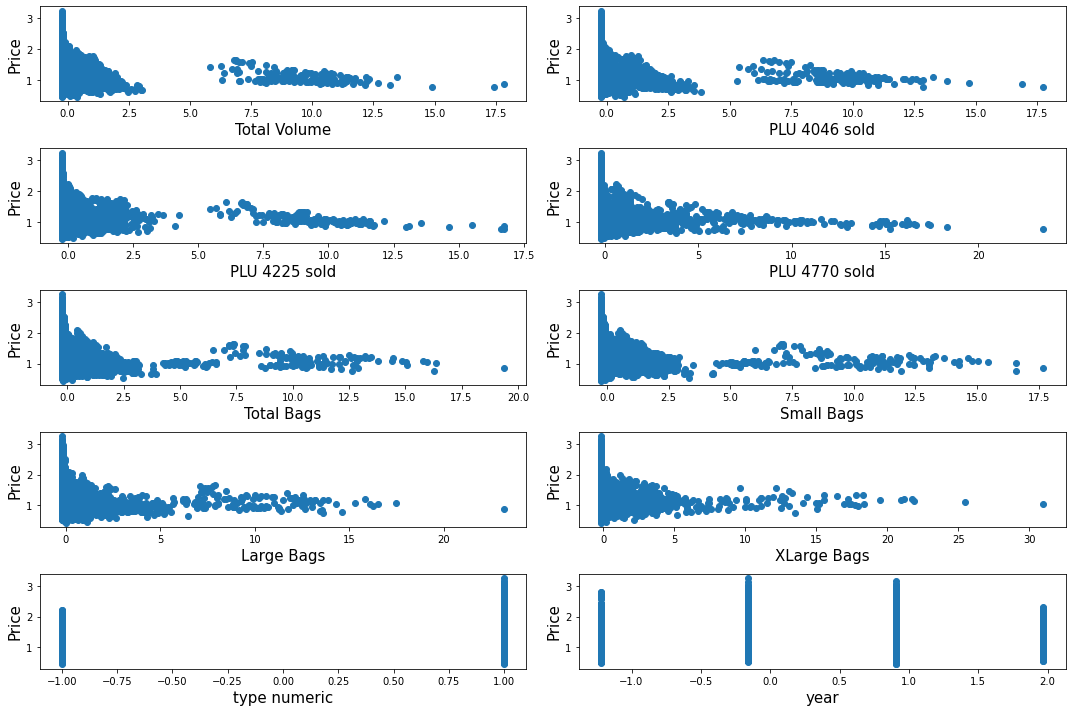

In [28]:
# Plotting the predictors versus price 
plt.figure(figsize=(15,10))

for i in range(10):
    plt.subplot(5,2,i+1)
    plt.scatter(X2[:, i], y2)
    plt.xlabel(df_avocado_numeric.columns[i], fontsize=15)
    plt.ylabel('Price', fontsize=15)
    
plt.tight_layout()
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

# Fitting a standard multilinear regression to the data
multireg = LinearRegression()
multireg.fit(X2_train, y2_train)

# Predicting the price on the test dataset
y2_multireg_pred = multireg.predict(X2_test)

# Printing MSE and R2
print_metrics(y2_test, y2_multireg_pred)

MSE 0.09896206343010702, R^2 0.3787158514520944


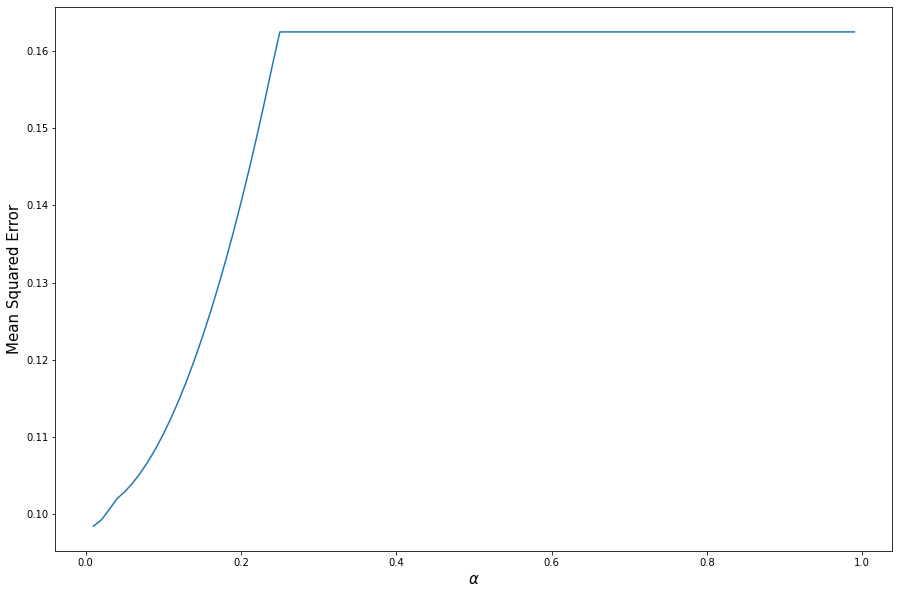

In [30]:
from sklearn.linear_model import LassoCV

# Fitting a lasso regression to find the predictors that contribute the most
alphas = np.arange(0.01, 1, 0.01)
lasso = LassoCV(alphas=alphas, cv=50)
lasso.fit(X2_train, y2_train)

# Plotting a graph of alpha vs mse

plt.figure(figsize=(15, 10))
plt.plot(lasso.alphas_,lasso.mse_path_.mean(axis=1))
plt.xlabel(r'$\alpha$', fontsize=15)
plt.ylabel('Mean Squared Error', fontsize=15)
plt.show()

In [31]:
# Predicting the price on the test set
y2_lasso_pred = lasso.predict(X2_test)

# Extracting and printing coefficients
coefs = lasso.coef_
print(f"Beta0 is {lasso.intercept_}")
for k, coeff in enumerate(coefs):
    print(f"Beta{k+1} is {coeff}")

Beta0 is 1.405594000992463
Beta1 is -0.0
Beta2 is -0.021678981374046103
Beta3 is 0.0
Beta4 is -0.0
Beta5 is -0.0
Beta6 is -0.0
Beta7 is -0.0
Beta8 is 0.0
Beta9 is 0.23427425434004429
Beta10 is 0.026886274911251614
Beta11 is -0.0


In [32]:
# Selecting the predictors with non-zero betas
X2_new = X2[:, coefs != 0]

# Performing a train-test split on the new data
X2_new_train, X2_new_test, y2_new_train, y2_new_test = train_test_split(X2_new, y2, test_size=0.1)

In [33]:
# Fitting a multilinear regression to the new data
multireg2 = LinearRegression()
multireg2.fit(X2_new_train, y2_new_train)
y2_multireg2_pred = multireg2.predict(X2_new_test)

print_metrics(y2_new_test, y2_multireg2_pred)

MSE 0.09997240055728855, R^2 0.37592312854239207


In [34]:
# Installing xgboost
!pip install xgboost

In [35]:
from xgboost import XGBRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Defining parameters for cross-validation. Parameter grid is 
param_grid = {
    'n_estimators' : [800, 1000],
    'gamma': [0.2, 0.3],
    'max_depth' : [8, 10]
    
}

# Setting up base estimator
base_xgb = XGBRegressor(objective='reg:squarederror')

# Setting up cross-validation
best_xgb = HalvingGridSearchCV(
    base_xgb,
    param_grid,
    cv=3,
    factor=3,
    verbose=3,
    aggressive_elimination=True
)

# Cross-validating
best_xgb.fit(X2_train, y2_train)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 5474
max_resources_: 16424
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 5474
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, max_depth=8, n_estimators=800;, score=(train=0.884, test=0.737) total time=   6.1s
[CV 2/3] END gamma=0.2, max_depth=8, n_estimators=800;, score=(train=0.877, test=0.729) total time=  10.6s
[CV 3/3] END gamma=0.2, max_depth=8, n_estimators=800;, score=(train=0.881, test=0.727) total time=  11.0s
[CV 1/3] END gamma=0.2, max_depth=8, n_estimators=1000;, score=(train=0.884, test=0.737) total time=  14.7s
[CV 2/3] END gamma=0.2, max_depth=8, n_estimators=1000;, score=(train=0.877, test=0.729) total time=   8.1s
[CV 3/3] END gamma=0.2, max_depth=8, n_estimators=1000;, score=(train=0.881, test=0.727) total time=   5.6s
[CV 1/3] END gamma=0.2, max_depth=10, n_estimators=800;, score=(train=0.891, test=0.739) total

HalvingGridSearchCV(aggressive_elimination=True, cv=3,
                    estimator=XGBRegressor(objective='reg:squarederror'),
                    param_grid={'gamma': [0.2, 0.3], 'max_depth': [8, 10],
                                'n_estimators': [800, 1000]},
                    verbose=3)

In [36]:
# Predicting the price on the test set and printing metrics
y2_xgb_pred = best_xgb.predict(X2_test)
print_metrics(y2_test, y2_xgb_pred)

MSE 0.026401339842060716, R^2 0.834252304612836


In [37]:
def moving_average(array, n=100):
    """
    Returns a numpy array containing a moving average of the input array
    over window n.

    Arguments:
    array : 1d np array
    """
    ret = np.cumsum(array)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n



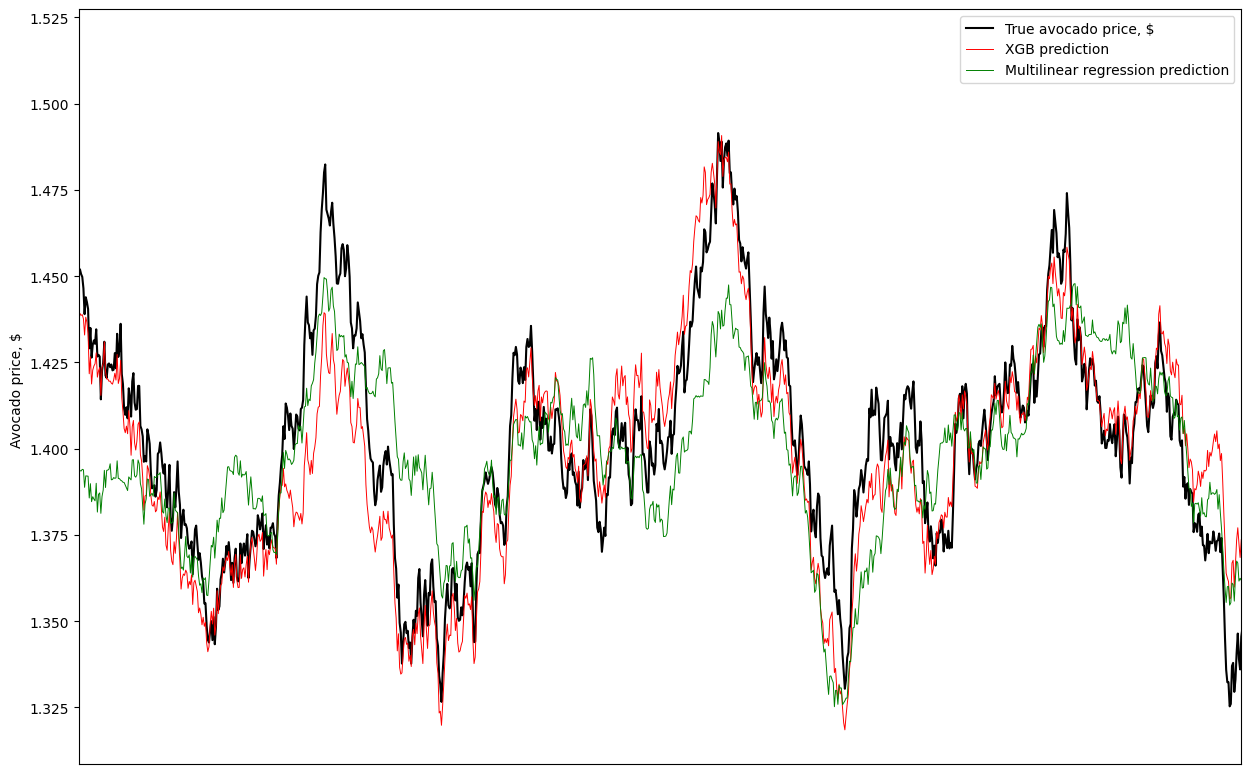

In [38]:
# Plotting a moving average of the true price, the XGBoost prediction and the multilinear regression prediction.
plt.figure(figsize=(15, 10), dpi=100)

plt.plot(moving_average(y2_test), label='True avocado price, $', linewidth=1.5, c='black')
plt.plot(moving_average(y2_xgb_pred), label='XGBoost prediction', linewidth=0.7, c='red')
plt.plot(moving_average(y2_multireg_pred), label='Multilinear regression prediction', linewidth=0.7, c='green')

plt.xlim([0, 1000])
plt.xticks([])
plt.ylabel('Avocado price, $ ')
plt.legend()
plt.show()

# Problem 3: Clustering (10 Marks)

Load the **Clusters.csv** dataset into a dataframe. Use K-Means clustering to predict how many clusters there are.

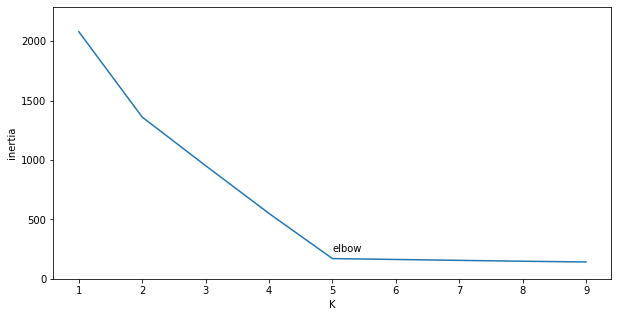

In [39]:
# Reading values from Clusters.csv
cluster_df = pd.read_csv(data_dir/'Clusters.csv')
X3 = cluster_df.values

# Calculating inertias for 1-9 clusters
Ks = np.arange(1,10)
inertias = []
for K in Ks:
    kmeans = KMeans(n_clusters=K, random_state=0).fit(X3)
    inertias.append(kmeans.inertia_)
    

# Plotting inertia vs K to find the elbow point
plt.figure(figsize=(15, 7))
plt.plot(Ks,inertias)
plt.xlabel('K')
plt.ylabel('inertia')
plt.annotate('elbow',xy=(5,1.4*inertias[5]))
plt.ylim(0,1.1*max(inertias))
plt.xticks(np.arange(1,10))
plt.show()

We can see from the above graph of inertia vs K that the number of clusters in the dataset is 5.

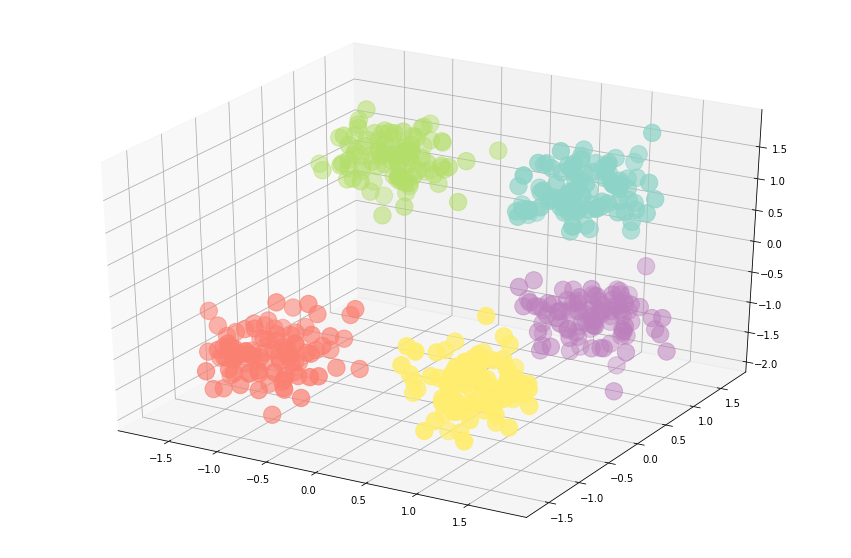

In [40]:
# Setting up the best clustering algorithm and predicting
best_kmeans = KMeans(n_clusters=5, random_state=0)
best_kmeans.fit(X3)
y3 = best_kmeans.predict(X3)

# Plotting three dimensions of the data, colored according to the predicted cluster
plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], c=y3, s=300, cmap = 'Set3')
plt.show()

# Problem 4: Neural Networks (30 Marks)

1. (5 marks) Import the Fashion MNIST data set by using ``tf.keras.datasets.fashion_mnist.load_data()``. The description of the data can be found here https://keras.io/api/datasets/fashion_mnist/. It will automatically split the data into training and test. Plot one image from each category. 
2. (10 marks) Construct a feedforward neural network with three hidden layers. Adapt the network so that it can be fitted to the training data set. Determine the accuracy of your model. 
3. (15 marks) Construct a Convolutional Neural Network with two convolutional blocks followed by densely connected layers. Fit the model to the Fashion MNIST data and compare the accuracy of your model with your three layer network. To reduce overfitting consider adding dropout layers.   

In [41]:
# Loading data
(X4_train, y4_train), (X4_test, y4_test) = tf.keras.datasets.fashion_mnist.load_data()

# Reshaping the data to a tensor
X4_train = X4_train.reshape(60000, 28, 28, 1)
X4_test = X4_test.reshape(10000, 28, 28, 1)

y4_train = tf.keras.utils.to_categorical(y4_train, 10)
y4_test = tf.keras.utils.to_categorical(y4_test, 10)

4431872/4422102 [==============================] - 0s 0us/step


In [42]:
X4_train.shape

(60000, 28, 28, 1)

In [43]:
# Class names for later visualisations
names = [
    'T-Shirt', 'Trousers', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
]

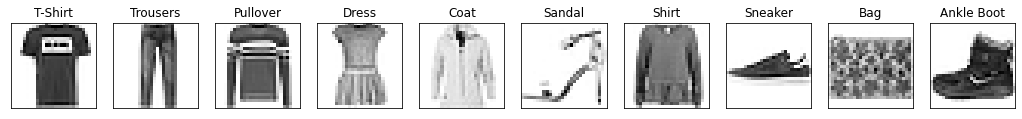

In [44]:
# Plotting an image from each class
plt.figure(figsize=(18, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(names[i])
    plt.imshow(X4_train[y4_train.argmax(axis=1)==i][0].reshape(28,28), cmap = 'Greys')

In [45]:
# Setting up the image data generator
datagen = ImageDataGenerator(
    rescale=1./255, 
    featurewise_center=True, 
    featurewise_std_normalization=True,
    validation_split=0.1
    )

# Preprocessing data
datagen.fit(X4_train) 
datagen.fit(X4_test)

In [46]:
# Setting up training, validation and test datasets
fashion_mnist_train_dataset = datagen.flow(
    X4_train,
    y4_train,
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    subset='training' 
    )

fashion_mnist_val_dataset = datagen.flow(
    X4_train,
    y4_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation'
    )

fashion_mnist_test_dataset =  datagen.flow(
    X4_test,
    y4_test,
    batch_size=1,
    shuffle=True
    )

In [47]:
# Defining parameters for the neural network
loss = 'categorical_crossentropy'
metrics = ["accuracy"] 
EPOCHS = 40
BATCH_SIZE = 128
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [48]:
# Checkpoints for saving the best model weights 
ff_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "ff_fashion_mnist_model.h5",
    monitor='val_accuracy',
    verbose = 1, 
    save_best_only = True,
)

cnn_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "cnn_fashion_mnist_model.h5",
    monitor='val_accuracy',
    verbose = 1, 
    save_best_only = True
)

# Stops training if val loss has not improved for 5 epochs
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1
)

# Learning rate decay function
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Setting up learning rate scheduler
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(scheduler)

# Initialising callback lists
ff_fashion_mnist_callbacks_list = [ff_checkpoint, earlystopping, lr_scheduler]
cnn_fashion_mnist_callbacks_list = [cnn_checkpoint, earlystopping, lr_scheduler]

In [49]:
# Defining the feedforward neural network
ff_network = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [50]:
# Compiling the feedforward network
ff_network.compile(optimizer=optimizer,loss=loss, metrics=metrics)

In [51]:
# Fitting the feedforward network
ff_fashion_mnist_history = ff_network.fit(
    fashion_mnist_train_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data = fashion_mnist_val_dataset, 
    callbacks=ff_fashion_mnist_callbacks_list
)

Epoch 1/40
419/422 [============================>.] - ETA: 0s - loss: 0.7066 - accuracy: 0.7540
Epoch 1: val_accuracy improved from -inf to 0.84983, saving model to ff_fashion_mnist_model.h5
422/422 [==============================] - 8s 17ms/step - loss: 0.7054 - accuracy: 0.7545 - val_loss: 0.4242 - val_accuracy: 0.8498 - lr: 0.0010
Epoch 2/40
419/422 [============================>.] - ETA: 0s - loss: 0.4626 - accuracy: 0.8376
Epoch 2: val_accuracy improved from 0.84983 to 0.86000, saving model to ff_fashion_mnist_model.h5
422/422 [==============================] - 7s 17ms/step - loss: 0.4619 - accuracy: 0.8380 - val_loss: 0.3853 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 3/40
419/422 [============================>.] - ETA: 0s - loss: 0.4199 - accuracy: 0.8532
Epoch 3: val_accuracy improved from 0.86000 to 0.86617, saving model to ff_fashion_mnist_model.h5
422/422 [==============================] - 7s 16ms/step - loss: 0.4198 - accuracy: 0.8532 - val_loss: 0.3727 - val_accuracy: 0.8662

In [52]:
# Loading best weights and predicting the class of the test data
ff_network.load_weights('ff_fashion_mnist_model.h5')
y4_ff_pred = ff_network.predict(X4_test)

# Evaluating the network
y4_ff_acc = ff_network.evaluate(fashion_mnist_test_dataset)
print('Accuracy', y4_ff_acc[1])

10000/10000 [==============================] - 36s 4ms/step - loss: 0.3572 - accuracy: 0.8775
Accuracy 0.8774999976158142


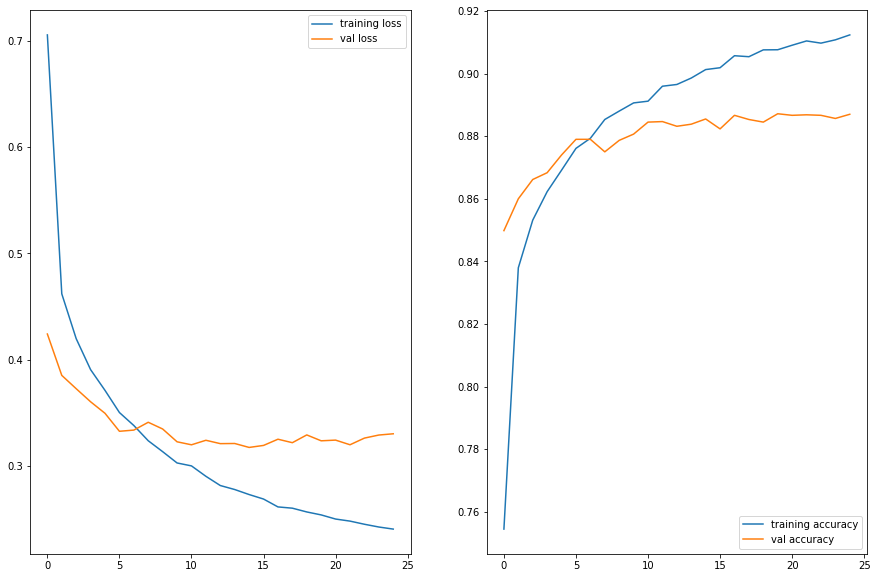

In [53]:
# Plotting the loss and accuracy per epoch
plot_history(ff_fashion_mnist_history)

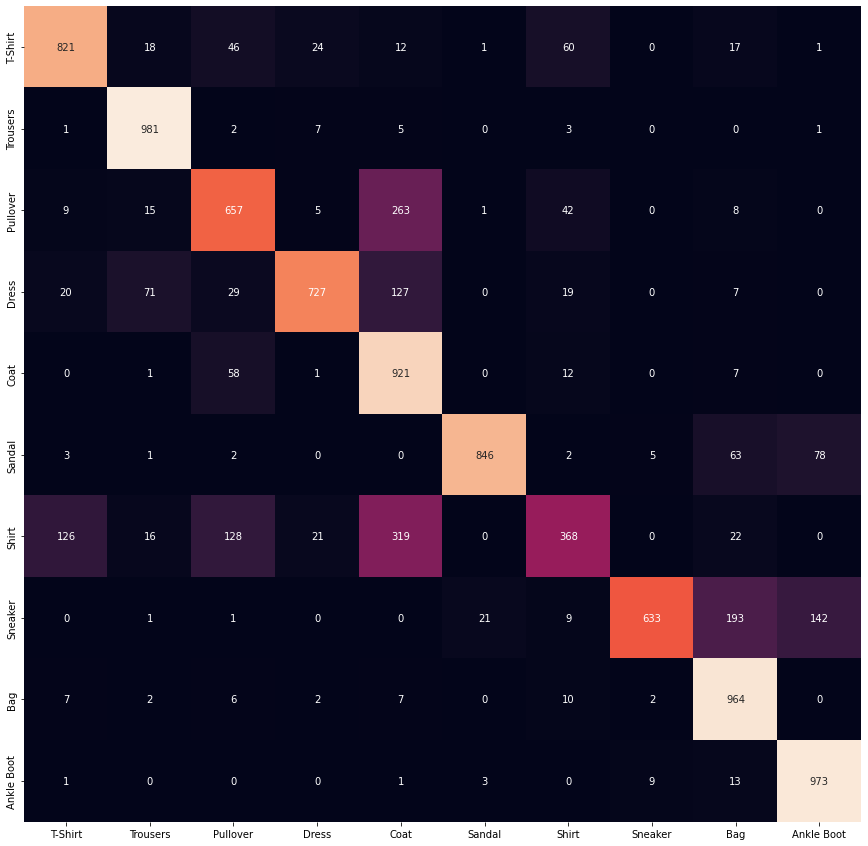

In [54]:
# Plotting a confusion matrix 
plot_confusion_matrix(y4_test, y4_ff_pred, names)

<Figure size 1080x1080 with 0 Axes>

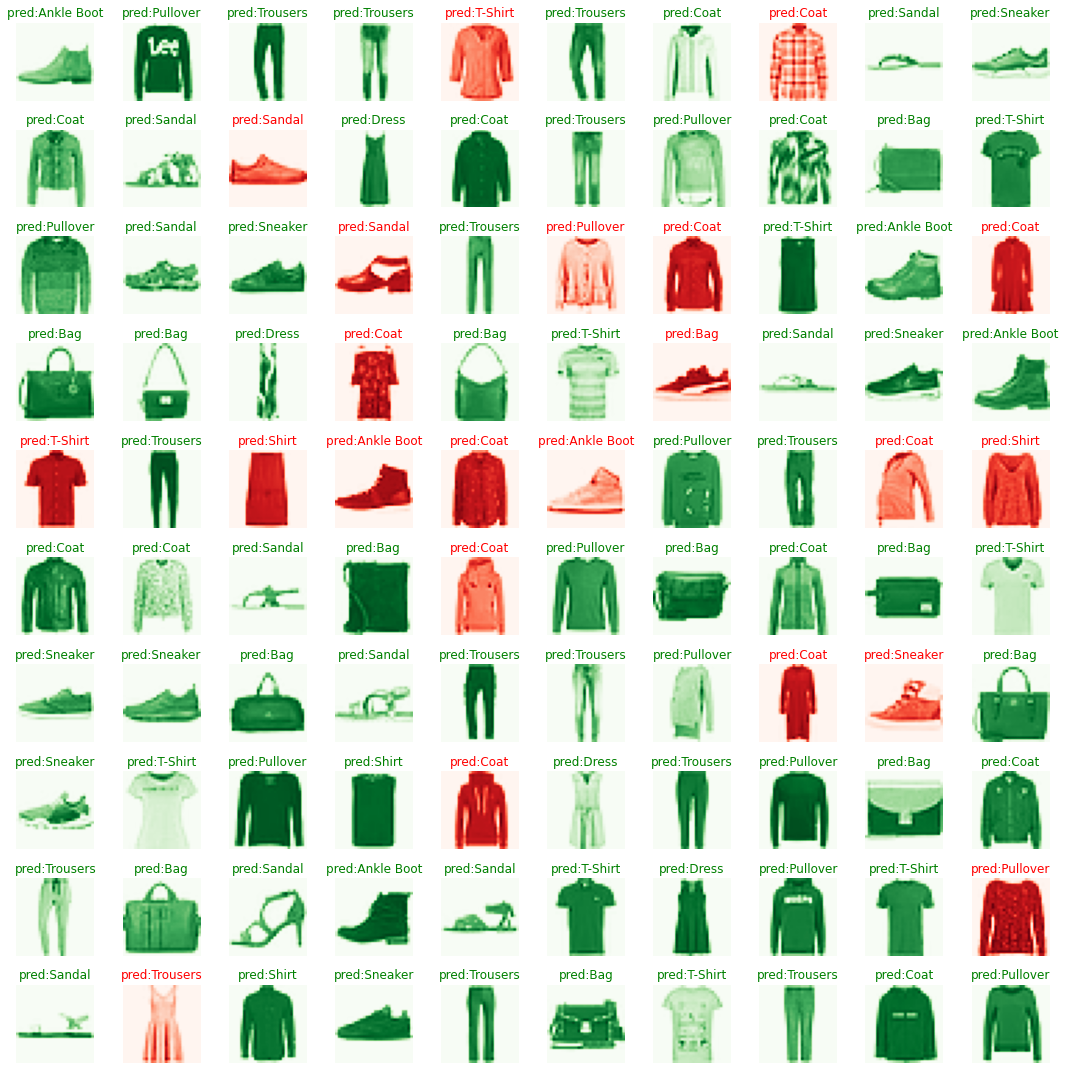

In [55]:
# Plotting a grid of predicted images
plot_image_grid(X4_test, y4_test, y4_ff_pred, names)

In [56]:
# Defining the convolutional network
conv_network = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax'),
])  

In [57]:
# Compiling the network
conv_network.compile(optimizer=optimizer,loss=loss, 
              metrics=metrics)

In [58]:
# Fitting the network on the training datta
cnn_fashion_mnist_history = conv_network.fit(
    fashion_mnist_train_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data = fashion_mnist_val_dataset, 
    callbacks=cnn_fashion_mnist_callbacks_list
)

Epoch 1/40
420/422 [============================>.] - ETA: 0s - loss: 0.6626 - accuracy: 0.7538
Epoch 1: val_accuracy improved from -inf to 0.84267, saving model to cnn_fashion_mnist_model.h5
422/422 [==============================] - 7s 14ms/step - loss: 0.6620 - accuracy: 0.7540 - val_loss: 0.4440 - val_accuracy: 0.8427 - lr: 1.3534e-04
Epoch 2/40
420/422 [============================>.] - ETA: 0s - loss: 0.4697 - accuracy: 0.8279
Epoch 2: val_accuracy improved from 0.84267 to 0.86017, saving model to cnn_fashion_mnist_model.h5
422/422 [==============================] - 6s 14ms/step - loss: 0.4699 - accuracy: 0.8279 - val_loss: 0.3940 - val_accuracy: 0.8602 - lr: 1.3534e-04
Epoch 3/40
419/422 [============================>.] - ETA: 0s - loss: 0.4222 - accuracy: 0.8460
Epoch 3: val_accuracy improved from 0.86017 to 0.86817, saving model to cnn_fashion_mnist_model.h5
422/422 [==============================] - 6s 14ms/step - loss: 0.4218 - accuracy: 0.8462 - val_loss: 0.3591 - val_accur

In [59]:
# Loading the best weights and predicting on the test data
conv_network.load_weights('cnn_fashion_mnist_model.h5')
y4_conv_pred = conv_network.predict(X4_test)
# Evaluating the accuracy of the model 
y4_conv_acc = conv_network.evaluate(fashion_mnist_test_dataset)
print('test accuracy' , y4_conv_acc[1])

10000/10000 [==============================] - 41s 4ms/step - loss: 0.2770 - accuracy: 0.8977
test accuracy 0.8977000117301941


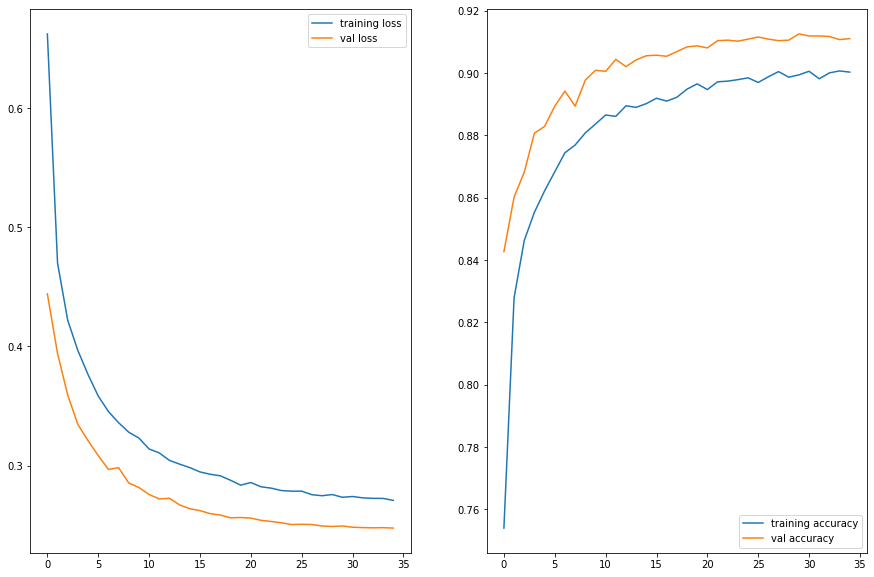

In [60]:
# Plotting the loss and accuracy per epoch
plot_history(cnn_fashion_mnist_history)

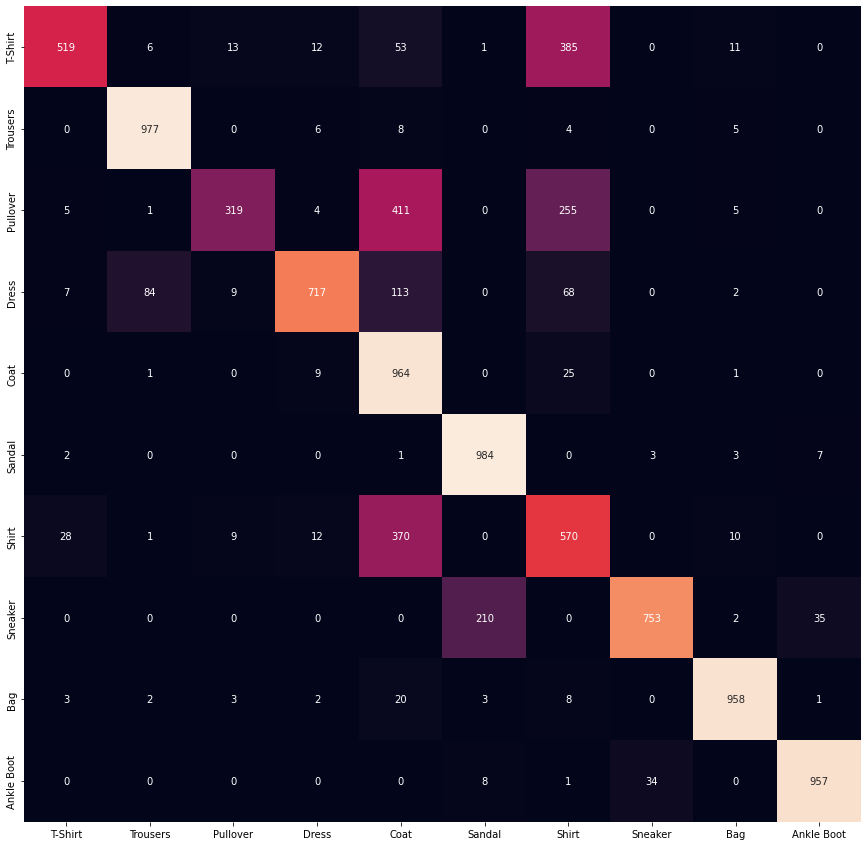

In [61]:
# Plotting a confusion matrix
plot_confusion_matrix(y4_test, y4_conv_pred, names)

<Figure size 1080x1080 with 0 Axes>

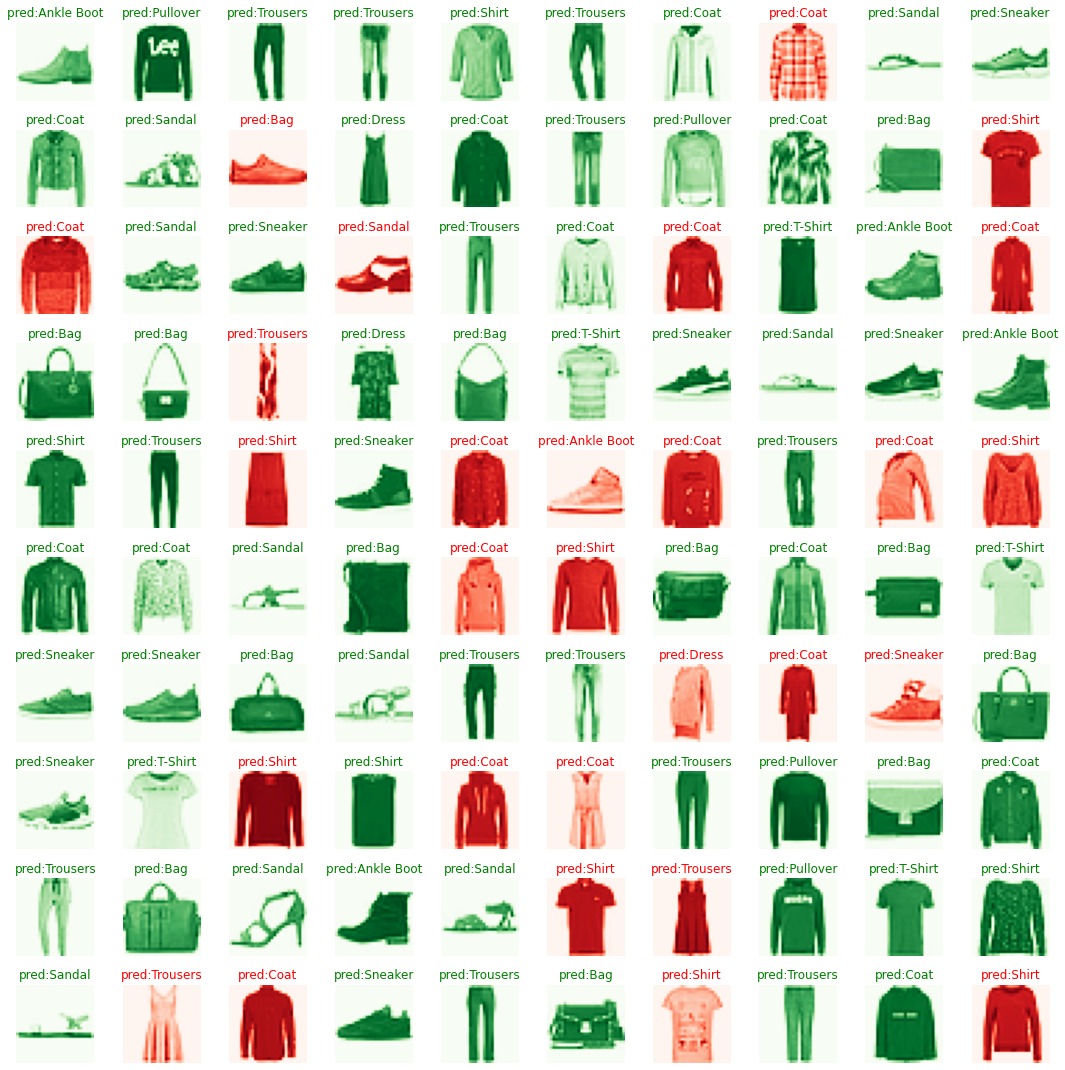

In [62]:
# Plotting a grid of predicted images
plot_image_grid(X4_test, y4_test, y4_conv_pred, names)